## Demo Bunka

Bunka is a class that inherits from different subclasses that carry out diverse machine learning and Natural Language Processing operatioons

In [1]:
import pandas as pd
from bunkatech import Bunka
import warnings
warnings.filterwarnings('ignore')
 
    
data = pd.read_csv('../data/imdb.csv', index_col = [0])
data = data.sample(2000, random_state = 42)

###  Instantiate the BasicSemantics class

In [2]:
bunka = Bunka(data = data,
                text_var = 'description',
                index_var = 'imdb',
                extract_terms=True,
                terms_embedding=True,
                docs_embedding=True,
                sample_size_terms=2000,
                terms_limit=2000,
                terms_ents=False,
                terms_ngrams=(2, 2),
                terms_ncs=False,
                terms_include_pos=["NOUN", "PROPN", "ADJ"],
                terms_include_types=["PERSON", "ORG"],
                terms_embedding_model="all-MiniLM-L6-v2",
                docs_embedding_model="all-MiniLM-L6-v2",
                language="en",
                terms_path=None,
                docs_dimension_reduction = 5,
                terms_embeddings_path=None,
                docs_embeddings_path=None,
                docs_multiprocessing = True,
                terms_multiprocessing = True)

  0%|                                                                           | 0/1991 [00:00<?, ?it/s]2022-03-31 09:58:47,774 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:58:47,783 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:58:47,791 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:58:47,798 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:58:47,800 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:58:47,800 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:58:47,801 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:58:47,803 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
100%|███████████████████████████████████████████████████████████████| 1991/1991 [00:09<00:00, 206.15it/s]
2022-03-31 09:58:50,479 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-31 09:58:58,076 - INFO : Use pytorch device: c

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2022-03-31 09:59:06,017 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Start Embedding...


2022-03-31 09:59:13,669 - INFO : Use pytorch device: cpu
2022-03-31 09:59:13,669 - INFO : CUDA is not available. Start 4 CPU worker
2022-03-31 09:59:13,670 - INFO : Start multi-process pool on devices: cpu, cpu, cpu, cpu


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-03-31 09:59:18,778 - INFO : Chunk data into packages of size 50


UMAP(n_components=5, verbose=True)
Thu Mar 31 09:59:34 2022 Construct fuzzy simplicial set
Thu Mar 31 09:59:35 2022 Finding Nearest Neighbors
Thu Mar 31 09:59:36 2022 Finished Nearest Neighbor Search
Thu Mar 31 09:59:38 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Mar 31 09:59:40 2022 Finished embedding


#### Fit the class

For multilangue embedding, **distiluse-base-multilingual-cased-v1** is the best to use. For only english, you may use **all-MiniLM-L6-v2**

#### Display the results

In [3]:
terms = bunka.terms # Display extracted terms
terms_embeddings = bunka.terms_embeddings # Display terms embeddings
docs_embeddings = bunka.docs_embeddings # Display docs embeddings

In [4]:
terms.head(5)

,lemma,count_terms,text,main form,ent
0,new york,57,New York,new york,NaN
1,young man,45,young man | young men,young man,NaN
2,young woman,40,young woman | young women | younger woman,young woman,NaN
3,york city,33,York City,york city,NaN
4,good friend,29,best friend | best friends,best friend,NaN


In [5]:
terms_embeddings.head(5)

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
new york,0.086363,-0.019883,0.071494,0.048815,-0.033144,-0.001401,0.008352,-0.057807,-0.017513,-0.039793,...,0.017531,0.031692,-0.016117,0.021929,-0.076663,0.041794,0.103244,-0.045446,-0.027529,0.035334
young man,-0.054424,0.102381,-0.016731,-0.009139,0.017711,-0.023019,0.142750,-0.012219,0.006698,0.027264,...,0.145699,-0.039291,-0.015133,0.067595,0.000700,-0.006800,0.139238,-0.026916,0.015822,0.022758
young woman,-0.035009,0.024305,-0.004279,0.007209,-0.012090,0.017953,0.071988,0.025450,0.023999,0.037704,...,0.005457,0.021963,0.012095,0.018253,0.003366,0.097345,0.064532,-0.000051,0.076264,0.005071
york city,0.075048,0.030160,0.041267,0.049191,-0.044017,0.016805,0.041382,-0.028511,-0.046098,-0.010233,...,0.009820,-0.019376,-0.018167,0.007974,-0.086875,0.037915,0.106390,-0.024629,-0.020410,0.048810
best friend,-0.128368,0.077111,0.033445,-0.043633,0.011336,-0.026740,0.085022,0.139915,-0.011521,0.022746,...,0.035195,-0.043817,-0.054759,0.016440,0.040268,-0.010632,0.113419,0.062290,-0.060212,0.090107


In [6]:
docs_embeddings.head(5)

,0,1,2,3,4
imdb,,,,,
tt0205177,10.778655,12.731787,9.917603,9.748825,5.757606
tt2316801,10.787731,11.270711,10.213952,10.440894,6.530781
tt0465234,10.863423,11.533998,12.513124,9.066171,5.337594
tt1846589,10.216979,10.843116,12.539352,9.109861,6.352147
tt0824758,10.128883,10.524232,10.062469,9.939275,5.805839


#### Origami projection

2022-03-31 10:02:39,203 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-31 10:02:46,682 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

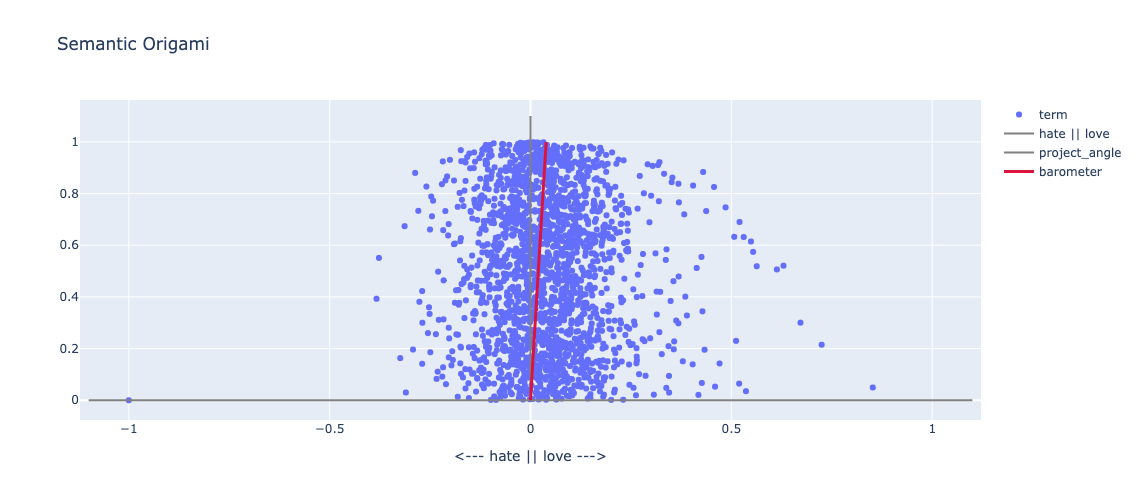

In [8]:
fig = bunka.origami_projection_unique(
                    left_axis= ['love'],
                    right_axis = ['hate'],
                    height=500,
                    width=1000,
                    type="terms",
                    dispersion=True,
                    barometer=True,
                    explainer = True
    
                )
fig.show()

#### Draw networks

In [ ]:
fig = bunka.fit_draw(
            variables=["main form"],
            top_n=200,
            global_filter=0.2,
            n_neighbours=6,
            method="node2vec",
            n_cluster=10,
            bin_number=30,
            black_hole_force=1,
            color="community",
            size="size",
            symbol="entity",
            textfont_size=9,
            edge_size=1,
            height=1500,
            width=1500,
            template="plotly_dark",
        )

fig.show()

In [12]:
# If you wish to export the .html fig
import plotly
plotly.offline.plot(fig, filename = 'fig.html', auto_open=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


'fig.html'

### Display Nexted Topics

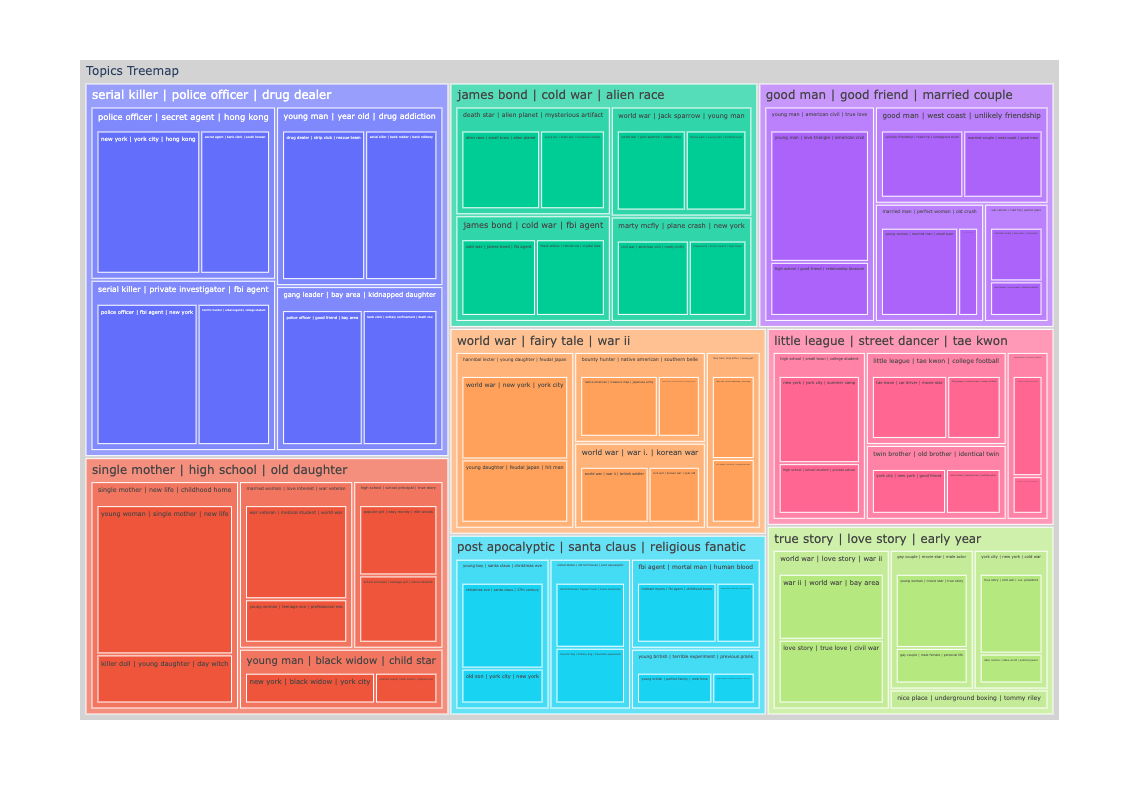

In [15]:
fig_nested = bunka.nested_maps(
        size_rule="docs_size",
        map_type="treemap", # Try sunburst
        width=800,
        height=800,
        query=None) # You can query the map with an exact query

fig_nested.show()

#### Display trends